In [1]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
### 使用 networkx 包中的函数 LFR_benchmark_graph 生成随机图
import networkx as nx
from networkx.generators.community import LFR_benchmark_graph

n = 1000
tau1 = 2  # Power-law exponent for the degree distribution
tau2 = 1.1 # Power-law exponent for the community size distribution 
            #S hould be >1
mu = 0.05 # Mixing parameter
avg_deg = 25 # Average Degree
max_deg = 100 # Max Degree
min_commu = 80 # Min Community Size
max_commu = 100 # Max Community Size

G = LFR_benchmark_graph(
    n, tau1, tau2, mu, average_degree=avg_deg, max_degree=max_deg, min_community=min_commu, max_community=max_commu, 
    seed=7
)
### 去掉 G 中的重边和自环 
G = nx.Graph(G) # Remove multi-edges

selfloop_edges = list(nx.selfloop_edges(G)) # a list of self loops

G.remove_edges_from(selfloop_edges) # Remove self-loops

In [3]:
betweenness = nx.betweenness_centrality(G)
top_nodes = sorted(betweenness, key=betweenness.get, reverse=True)

In [4]:
### LFR 图是有内在的社群结构的，每个节点的社群存储在其 community 属性中，是一个 set
# 通过运行循环，按照内在的社群结构给每个节点一个标签 即为其 intrinsic_membership
# 为了方便 intrinsic_membership 一开始是作为一个 np array 存储的
import numpy as np
intrinsic_communities = {frozenset(G.nodes[v]["community"]) for v in G}
intrinsic_membership = np.empty(G.number_of_nodes(), dtype=int)
for node in range(G.number_of_nodes()):
    for index, inner_set in enumerate(intrinsic_communities):
        if node in inner_set:
            intrinsic_membership[node] = index
            break
# intrinsic_membership = list(intrinsic_membership.values())

# 存储 list 和 clustering 格式的拷贝 省得以后需要再做类型转换了
#intrinsic_list = list(intrinsic_membership.values())
#from clusim.clustering import Clustering
#intrinsic_clustering = Clustering(elm2clu_dict={i: [intrinsic_membership[i]] for i in intrinsic_membership.keys()})

In [5]:
intrinsic_membership;

In [6]:
idx = [True] * G.number_of_nodes()

In [7]:
import random

temp = list(range(G.number_of_nodes()))
random.shuffle(temp)
#print(temp)

In [8]:
from auxpack.lle import lle
from auxpack.evaluate_embd702temp import evaluate_embd as EEE

from karateclub import DeepWalk

from ge import LINE

D=20
quxian =[]
for i in temp:
    G.remove_node(i)
    print(f"Vertex {i}, ranking {top_nodes.index(i)+1} is removed.", end=' ')
    if not nx.is_connected(G):
        print("G is now disconnected!!")
        break
    embd = lle(G, 20)
    idx[i] = False
    K = len(np.unique(intrinsic_membership[idx]))
    defen = EEE(K, intrinsic_membership[idx], embd)
    quxian.append(defen)
    print(f"{K} clusters; {G.number_of_nodes()} vertices; NMI", defen)

Vertex 912, ranking 863 is removed. 11 clusters; 999 vertices; NMI 1.0
Vertex 283, ranking 740 is removed. 11 clusters; 998 vertices; NMI 1.0
Vertex 372, ranking 428 is removed. 11 clusters; 997 vertices; NMI 1.0
Vertex 596, ranking 664 is removed. 11 clusters; 996 vertices; NMI 1.0
Vertex 565, ranking 269 is removed. 11 clusters; 995 vertices; NMI 1.0
Vertex 111, ranking 564 is removed. 11 clusters; 994 vertices; NMI 1.0
Vertex 445, ranking 995 is removed. 11 clusters; 993 vertices; NMI 1.0
Vertex 247, ranking 482 is removed. 11 clusters; 992 vertices; NMI 1.0
Vertex 864, ranking 784 is removed. 11 clusters; 991 vertices; NMI 1.0
Vertex 380, ranking 79 is removed. 11 clusters; 990 vertices; NMI 1.0
Vertex 251, ranking 414 is removed. 11 clusters; 989 vertices; NMI 0.9709114473085984
Vertex 50, ranking 688 is removed. 11 clusters; 988 vertices; NMI 1.0
Vertex 926, ranking 386 is removed. 11 clusters; 987 vertices; NMI 0.9999999999999998
Vertex 846, ranking 161 is removed. 11 clusters; 

Vertex 93, ranking 224 is removed. 11 clusters; 888 vertices; NMI 0.9611440072516043
Vertex 522, ranking 602 is removed. 11 clusters; 887 vertices; NMI 0.9999999999999998
Vertex 621, ranking 711 is removed. 11 clusters; 886 vertices; NMI 1.0
Vertex 2, ranking 536 is removed. 11 clusters; 885 vertices; NMI 1.0000000000000002
Vertex 577, ranking 477 is removed. 11 clusters; 884 vertices; NMI 1.0
Vertex 436, ranking 662 is removed. 11 clusters; 883 vertices; NMI 1.0
Vertex 37, ranking 538 is removed. 11 clusters; 882 vertices; NMI 0.970060888345835
Vertex 654, ranking 100 is removed. 11 clusters; 881 vertices; NMI 1.0
Vertex 866, ranking 936 is removed. 11 clusters; 880 vertices; NMI 0.9999999999999998
Vertex 787, ranking 527 is removed. 11 clusters; 879 vertices; NMI 1.0
Vertex 706, ranking 230 is removed. 11 clusters; 878 vertices; NMI 1.0
Vertex 503, ranking 715 is removed. 11 clusters; 877 vertices; NMI 1.0
Vertex 677, ranking 965 is removed. 11 clusters; 876 vertices; NMI 1.0
Vertex 

Vertex 709, ranking 501 is removed. 11 clusters; 780 vertices; NMI 1.0
Vertex 22, ranking 402 is removed. 11 clusters; 779 vertices; NMI 1.0
Vertex 196, ranking 493 is removed. 11 clusters; 778 vertices; NMI 0.9999999999999998
Vertex 410, ranking 846 is removed. 11 clusters; 777 vertices; NMI 1.0000000000000002
Vertex 127, ranking 472 is removed. 11 clusters; 776 vertices; NMI 1.0
Vertex 294, ranking 818 is removed. 11 clusters; 775 vertices; NMI 0.9999999999999998
Vertex 362, ranking 638 is removed. 11 clusters; 774 vertices; NMI 1.0
Vertex 766, ranking 87 is removed. 11 clusters; 773 vertices; NMI 1.0000000000000002
Vertex 490, ranking 297 is removed. 11 clusters; 772 vertices; NMI 1.0
Vertex 24, ranking 421 is removed. 11 clusters; 771 vertices; NMI 0.9999999999999998
Vertex 323, ranking 24 is removed. 11 clusters; 770 vertices; NMI 1.0000000000000002
Vertex 488, ranking 249 is removed. 11 clusters; 769 vertices; NMI 1.0
Vertex 696, ranking 727 is removed. 11 clusters; 768 vertices;

Vertex 960, ranking 934 is removed. 11 clusters; 676 vertices; NMI 1.0000000000000002
Vertex 411, ranking 781 is removed. 11 clusters; 675 vertices; NMI 0.97083285239043
Vertex 885, ranking 608 is removed. 11 clusters; 674 vertices; NMI 0.9763604989706607
Vertex 21, ranking 74 is removed. 11 clusters; 673 vertices; NMI 1.0
Vertex 602, ranking 596 is removed. 11 clusters; 672 vertices; NMI 0.9592178795954904
Vertex 392, ranking 1000 is removed. 11 clusters; 671 vertices; NMI 0.9589242552940789
Vertex 423, ranking 633 is removed. 11 clusters; 670 vertices; NMI 0.9746000559991791
Vertex 422, ranking 924 is removed. 11 clusters; 669 vertices; NMI 1.0
Vertex 981, ranking 808 is removed. 11 clusters; 668 vertices; NMI 1.0000000000000002
Vertex 42, ranking 274 is removed. 11 clusters; 667 vertices; NMI 0.9683479388570677
Vertex 167, ranking 292 is removed. 11 clusters; 666 vertices; NMI 1.0
Vertex 467, ranking 85 is removed. 11 clusters; 665 vertices; NMI 1.0
Vertex 597, ranking 56 is removed

Vertex 60, ranking 206 is removed. 11 clusters; 576 vertices; NMI 0.9727136104346482
Vertex 725, ranking 157 is removed. 11 clusters; 575 vertices; NMI 0.9732871355419039
Vertex 955, ranking 122 is removed. 11 clusters; 574 vertices; NMI 0.9793939553698211
Vertex 870, ranking 484 is removed. 11 clusters; 573 vertices; NMI 0.970373907980409
Vertex 833, ranking 643 is removed. 11 clusters; 572 vertices; NMI 0.9795321729644667
Vertex 480, ranking 211 is removed. 11 clusters; 571 vertices; NMI 0.962141222024087
Vertex 940, ranking 630 is removed. 11 clusters; 570 vertices; NMI 0.9999999999999998
Vertex 546, ranking 303 is removed. 11 clusters; 569 vertices; NMI 0.9784046220881493
Vertex 502, ranking 410 is removed. 11 clusters; 568 vertices; NMI 0.9746471715103358
Vertex 424, ranking 539 is removed. 11 clusters; 567 vertices; NMI 0.974603296609837
Vertex 133, ranking 458 is removed. 11 clusters; 566 vertices; NMI 0.9548842243164414
Vertex 622, ranking 592 is removed. 11 clusters; 565 verti

Vertex 809, ranking 568 is removed. 11 clusters; 476 vertices; NMI 0.9723786151347713
Vertex 573, ranking 45 is removed. 11 clusters; 475 vertices; NMI 0.9459582815304334
Vertex 707, ranking 593 is removed. 11 clusters; 474 vertices; NMI 0.984513242813967
Vertex 691, ranking 72 is removed. 11 clusters; 473 vertices; NMI 0.984782723342414
Vertex 13, ranking 507 is removed. 11 clusters; 472 vertices; NMI 0.9398067507121663
Vertex 818, ranking 862 is removed. 11 clusters; 471 vertices; NMI 0.9662848566934902
Vertex 775, ranking 144 is removed. 11 clusters; 470 vertices; NMI 0.9330611103957929
Vertex 171, ranking 569 is removed. 11 clusters; 469 vertices; NMI 0.9587051982357995
Vertex 442, ranking 945 is removed. 11 clusters; 468 vertices; NMI 0.9999999999999998
Vertex 533, ranking 372 is removed. 11 clusters; 467 vertices; NMI 0.9571692525168275
Vertex 394, ranking 17 is removed. 11 clusters; 466 vertices; NMI 1.0
Vertex 508, ranking 649 is removed. 11 clusters; 465 vertices; NMI 0.986458

Vertex 120, ranking 665 is removed. 11 clusters; 377 vertices; NMI 0.9670893787791971
Vertex 768, ranking 927 is removed. 11 clusters; 376 vertices; NMI 0.963904133990027
Vertex 298, ranking 165 is removed. 11 clusters; 375 vertices; NMI 0.9837343155160835
Vertex 841, ranking 634 is removed. 11 clusters; 374 vertices; NMI 0.9527955834447921
Vertex 971, ranking 423 is removed. 11 clusters; 373 vertices; NMI 0.9628953959214042
Vertex 195, ranking 201 is removed. 11 clusters; 372 vertices; NMI 0.9531291182727638
Vertex 983, ranking 192 is removed. 11 clusters; 371 vertices; NMI 0.9764286401144493
Vertex 194, ranking 917 is removed. 11 clusters; 370 vertices; NMI 0.9386307382446754
Vertex 715, ranking 326 is removed. 11 clusters; 369 vertices; NMI 0.9328448537103153
Vertex 918, ranking 713 is removed. 11 clusters; 368 vertices; NMI 0.9781484677109813
Vertex 799, ranking 276 is removed. 11 clusters; 367 vertices; NMI 0.953875042451424
Vertex 790, ranking 673 is removed. 11 clusters; 366 ver

Vertex 290, ranking 408 is removed. 11 clusters; 281 vertices; NMI 0.9432879067271688
Vertex 207, ranking 254 is removed. 11 clusters; 280 vertices; NMI 0.901832184302296
Vertex 949, ranking 532 is removed. 11 clusters; 279 vertices; NMI 0.8544882978267394
Vertex 765, ranking 647 is removed. 11 clusters; 278 vertices; NMI 0.9615473209553099
Vertex 12, ranking 227 is removed. 11 clusters; 277 vertices; NMI 0.942719048318238
Vertex 343, ranking 828 is removed. 11 clusters; 276 vertices; NMI 0.903616955006395
Vertex 594, ranking 116 is removed. 11 clusters; 275 vertices; NMI 0.8791818743060743
Vertex 761, ranking 730 is removed. 11 clusters; 274 vertices; NMI 0.9584833292978652
Vertex 54, ranking 551 is removed. 11 clusters; 273 vertices; NMI 0.9342299663954899
Vertex 544, ranking 650 is removed. 11 clusters; 272 vertices; NMI 0.9074755502393439
Vertex 915, ranking 360 is removed. 11 clusters; 271 vertices; NMI 0.960971190385549
Vertex 169, ranking 102 is removed. 11 clusters; 270 vertice

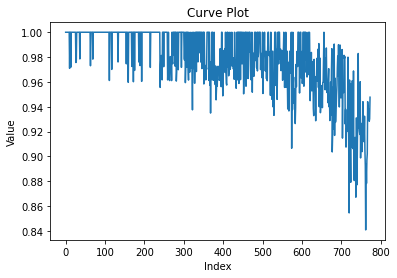

In [9]:
import matplotlib.pyplot as plt

# Example list of numbers
numbers = quxian

# Generate x-axis values based on the index of each number
x = range(len(numbers))

# Plot the curve
plt.plot(x, numbers)

# Add labels and title to the plot
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Curve Plot')

# Display the plot
plt.show()

In [24]:
G = LFR_benchmark_graph(
    n, tau1, tau2, mu, average_degree=avg_deg, max_degree=max_deg, min_community=min_commu, max_community=max_commu, 
    seed=7
)
### 去掉 G 中的重边和自环 
G = nx.Graph(G) # Remove multi-edges

selfloop_edges = list(nx.selfloop_edges(G)) # a list of self loops

G.remove_edges_from(selfloop_edges) # Remove self-loops

vertex_cut = nx.minimum_node_cut(G)

betweenness = nx.betweenness_centrality(G)
top_nodes = sorted(betweenness, key=betweenness.get, reverse=True)

In [25]:
mydict = {i:top_nodes.index(i) + 1 for i in vertex_cut}
print(mydict)
sorted_keys = sorted(mydict, key=mydict.get)

print(sorted_keys)

{248: 73, 40: 9, 297: 15, 169: 102, 45: 247, 622: 592, 141: 521, 240: 103, 342: 43, 760: 65, 506: 142, 892: 30, 895: 51}
[40, 297, 892, 342, 895, 760, 248, 169, 240, 506, 45, 141, 622]


In [26]:
from auxpack.lle import lle
from auxpack.evaluate_embd702temp import evaluate_embd as EEE

from karateclub import DeepWalk

from ge import LINE
idx = [True] * G.number_of_nodes()
D=20
attack =[]
for i in sorted_keys:
    G.remove_node(i)
    print(f"Vertex {i}, ranking {top_nodes.index(i)+1} is removed.", end=' ')
    if not nx.is_connected(G):
        print("G is now disconnected!!")
        break
    embd = lle(G, 20)
    idx[i] = False
    K = len(np.unique(intrinsic_membership[idx]))
    defen = EEE(K, intrinsic_membership[idx], embd)
    attack.append(defen)
    print(f"{K} clusters; {G.number_of_nodes()} vertices; NMI", defen)

Vertex 40, ranking 9 is removed. 11 clusters; 999 vertices; NMI 1.0
Vertex 297, ranking 15 is removed. 11 clusters; 998 vertices; NMI 1.0000000000000002
Vertex 892, ranking 30 is removed. 11 clusters; 997 vertices; NMI 1.0
Vertex 342, ranking 43 is removed. 11 clusters; 996 vertices; NMI 1.0
Vertex 895, ranking 51 is removed. 11 clusters; 995 vertices; NMI 0.9999999999999998
Vertex 760, ranking 65 is removed. 11 clusters; 994 vertices; NMI 1.0
Vertex 248, ranking 73 is removed. 11 clusters; 993 vertices; NMI 1.0
Vertex 169, ranking 102 is removed. 11 clusters; 992 vertices; NMI 0.9999999999999998
Vertex 240, ranking 103 is removed. 11 clusters; 991 vertices; NMI 0.9999999999999998
Vertex 506, ranking 142 is removed. 11 clusters; 990 vertices; NMI 0.9752364281547757
Vertex 45, ranking 247 is removed. 11 clusters; 989 vertices; NMI 1.0
Vertex 141, ranking 521 is removed. 11 clusters; 988 vertices; NMI 0.9959542438119984
Vertex 622, ranking 592 is removed. G is now disconnected!!


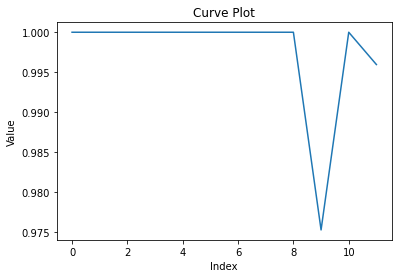

In [27]:
import matplotlib.pyplot as plt

# Example list of numbers
numbers = attack

# Generate x-axis values based on the index of each number
x = range(len(numbers))

# Plot the curve
plt.plot(x, numbers)

# Add labels and title to the plot
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Curve Plot')

# Display the plot
plt.show()